In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from tqdm import tqdm
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from skimage import io

/home/boris/Documents/kaggle cassava/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from cassava.transforms import get_train_transforms
from cassava.utils import *

/home/boris/Documents/kaggle cassava/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
%matplotlib inline

In [4]:
train_images_torch = context.catalog.load('train_images_torch')

2020-12-04 14:55:04,241 - kedro.io.data_catalog - INFO - Loading data from `train_images_torch` (ImageFolderDataSet)...


In [5]:
augs = get_train_transforms()
augs

Compose([
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  Resize(always_apply=False, p=1, height=256, width=256, interpolation=1),
  RandomResizedCrop(always_apply=False, p=1.0, height=227, width=227, scale=(0.4, 1), ratio=(0.75, 1.33), interpolation=1),
  HorizontalFlip(always_apply=False, p=0.5),
  VerticalFlip(always_apply=False, p=0.5),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [6]:
train_images_torch.transform = A.Compose([
    A.Resize(256, 256), 
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0), 
    ToTensorV2()])

In [7]:
unnorm = Unnormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

2020-12-04 14:55:04,356 - matplotlib.image - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


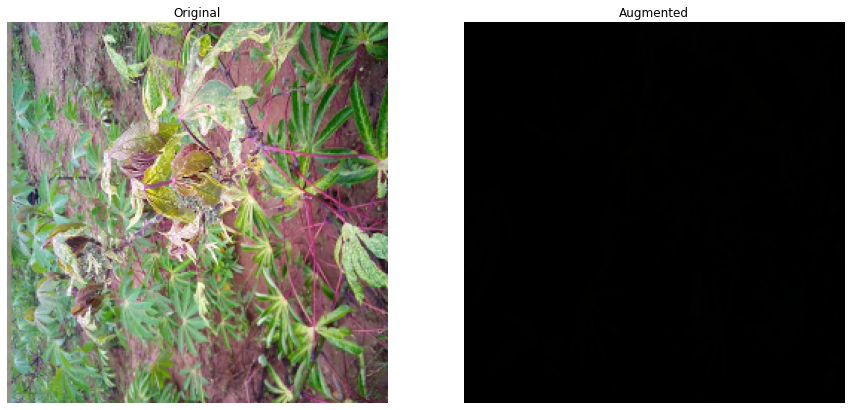

In [8]:
random_idx = np.random.choice(range(len(train_images_torch)))

image, label = train_images_torch[random_idx]
orig_image = np.array(unnorm(image.permute(1, 2, 0)))
aug_image = augs(image=orig_image)['image']

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_image(unnorm(image))
plt.title('Original')
plt.subplot(1, 2, 2)
plot_image(unnorm(aug_image))
plt.title('Augmented')
plt.show()

In [9]:
aug_image

tensor([[[-2.4630e-03, -3.6531e-03, -4.6205e-03,  ..., -2.7700e-03,
          -2.3603e-03, -1.5228e-03],
         [-2.0223e-03, -2.3769e-03, -3.0742e-03,  ..., -3.4199e-03,
          -2.8850e-03, -2.2082e-03],
         [-3.2582e-03, -3.9066e-03, -4.3164e-03,  ..., -3.2254e-03,
          -3.1490e-03, -3.0154e-03],
         ...,
         [-1.5748e-03, -2.5523e-04,  5.5227e-04,  ..., -6.3354e-04,
           1.7473e-04, -7.1254e-04],
         [-8.2174e-04,  2.9445e-05,  3.3098e-04,  ..., -5.2676e-04,
           3.9667e-04, -2.7195e-04],
         [-3.8108e-04, -2.0480e-04, -2.6375e-05,  ...,  2.8425e-04,
           9.4751e-04,  2.1845e-05]],

        [[-3.7266e-03, -4.5377e-03, -5.0797e-03,  ..., -3.3933e-03,
          -3.0273e-03, -2.2162e-03],
         [-1.6743e-03, -1.3685e-03, -1.4753e-03,  ..., -4.2224e-03,
          -3.8829e-03, -3.3674e-03],
         [-7.2348e-04, -7.1919e-04, -5.8910e-04,  ..., -4.0632e-03,
          -4.1949e-03, -4.2094e-03],
         ...,
         [ 2.5121e-03,  3

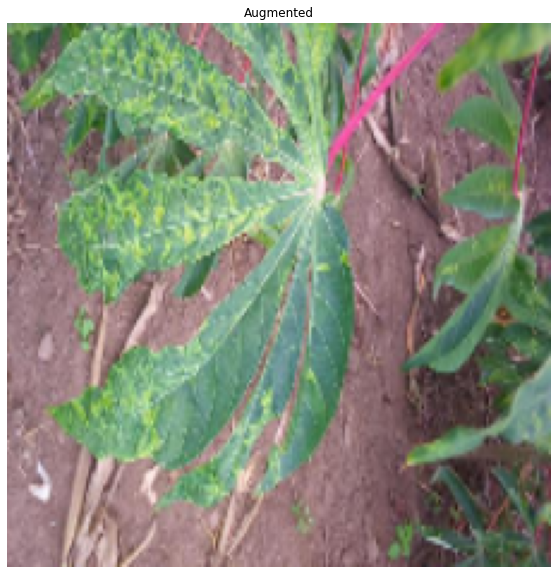

In [20]:
train_images_torch.transform = augs

random_idx = np.random.choice(range(len(train_images_torch)))

image, label = train_images_torch[random_idx]

plt.figure(figsize=(15, 10))
plot_image(unnorm(image))
plt.title('Augmented')
plt.show()